THIS IMPLEMENTS LINEAR REGRESSOR THAT I KIND OF USED FOR CLASSIFICATION, YES!

(1, 16) (1, 1) (1, 1)


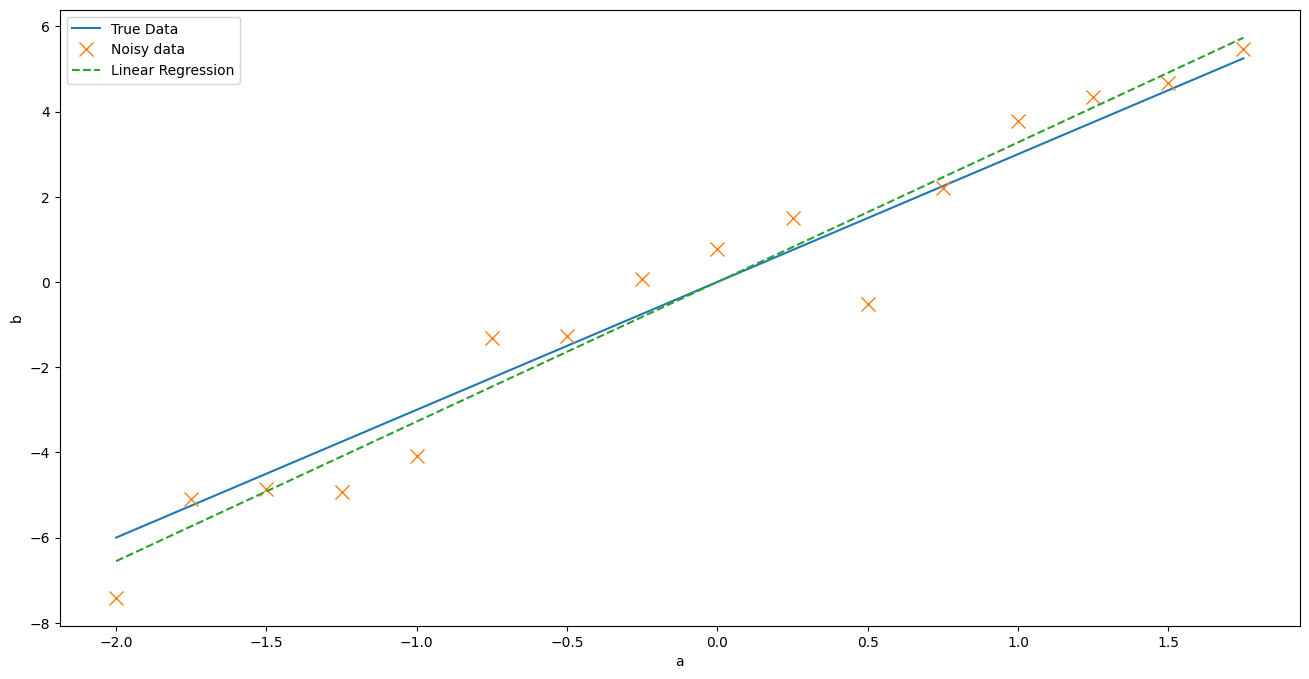

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
plt.rcParams['figure.figsize']=[16,8]

x=3
a=np.arange(-2,2,0.25)
a=a.reshape(-1,1)
b=x*a+np.random.randn(*a.shape)
plt.plot(a,a*x,label="True Data")
plt.plot(a,b,'x',markersize='10',label='Noisy data')

U,S,VT=np.linalg.svd(a,full_matrices=False)
S=np.diag(S)
S_inv=np.linalg.inv(S)
UT=np.transpose(U)
V=np.transpose(VT)
print(np.shape(UT),np.shape(V),np.shape(S))
x_tilde=V @ S_inv @ UT @ b
plt.plot(a,a*x_tilde,'--',label="Linear Regression")
plt.ylabel('b')
plt.xlabel('a')
plt.legend()
plt.show()

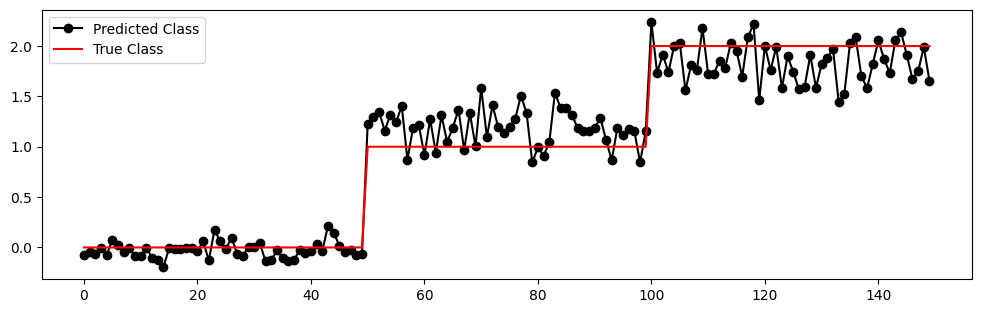

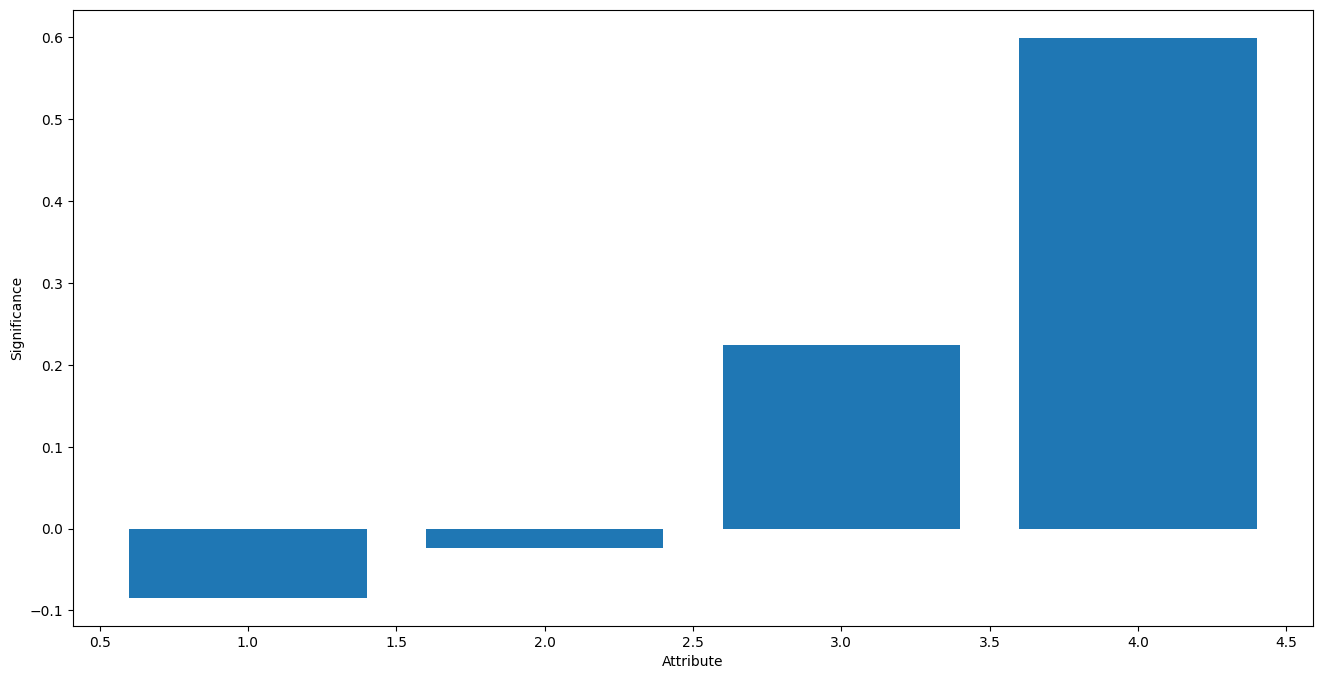

In [16]:
from sklearn.datasets import load_iris
data=load_iris()
a=data['data']
b=data['target']
U,S,VT=np.linalg.svd(a,full_matrices=False)
x_tilde=VT.T @ np.linalg.inv(np.diag(S)) @ U.T @b
ind=np.arange(0,10)
plt.figure(figsize=(12, 3.5))
plt.plot(a@x_tilde,'-o',label='Predicted Class',color='k')
plt.plot(b,label='True Class',color='r')
plt.legend()
plt.show()
plt.bar(np.arange(len(x_tilde))+1,x_tilde)
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.show()

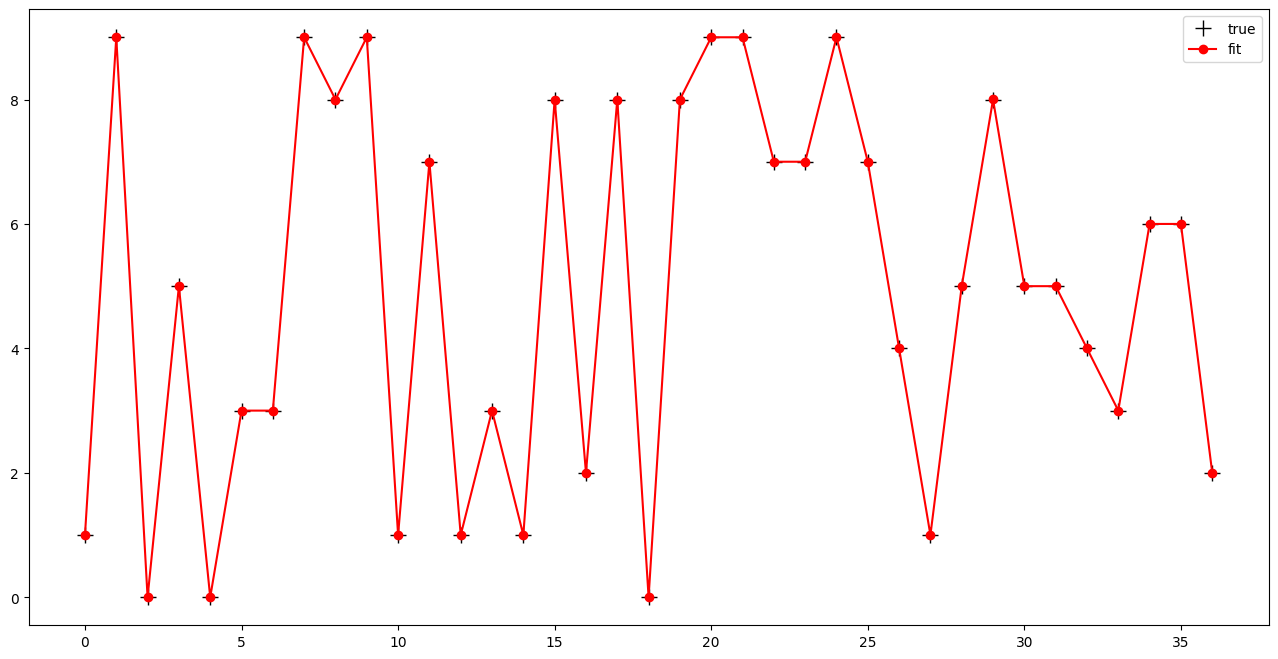

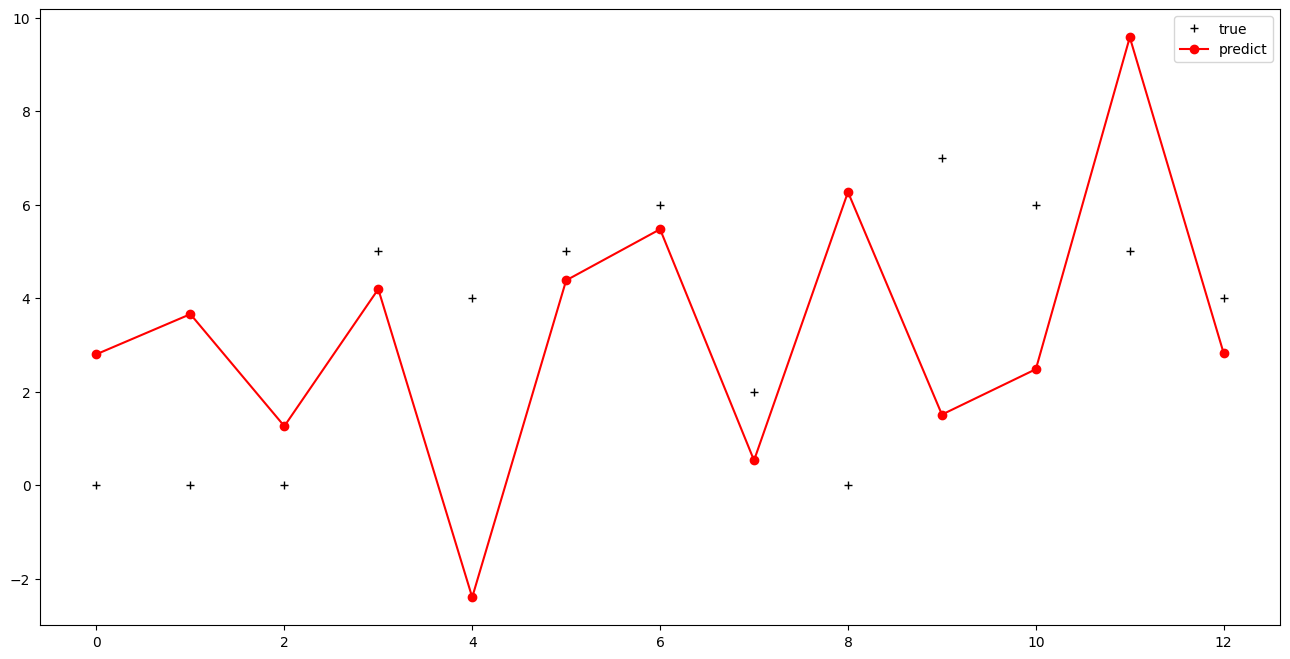

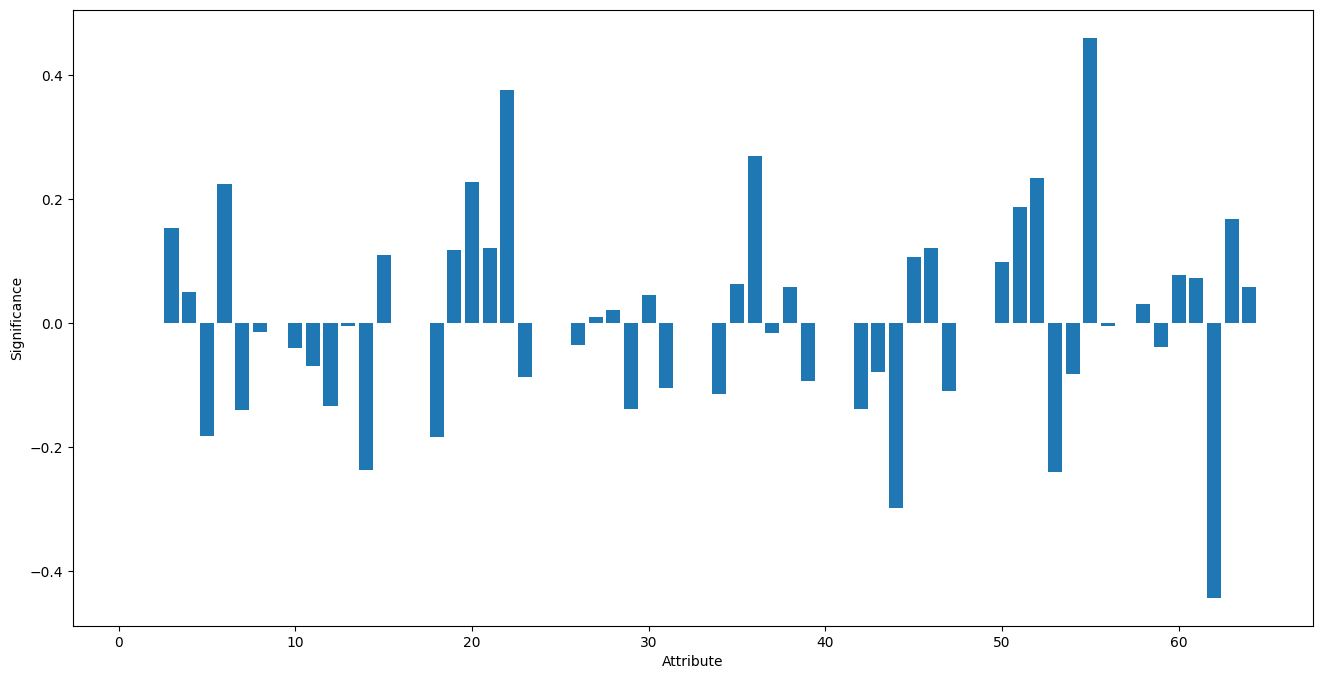

In [4]:
from sklearn.datasets import load_digits
n=50
p=np.random.permutation(n)
digits=load_digits()
A=digits['data'][0:n]
B=digits['target'][0:n]
A=A[p,:]
B=B[p]
f=0.75
r=int(n*f)

Atrain=A[:r]
Btrain=B[:r]
Atest=A[r:]
Btest=B[r:]

U,S,VT=np.linalg.svd(Atrain,full_matrices=False)

x_tilde=VT.T @ np.linalg.inv(np.diag(S))@ U.T @ Btrain

plt.plot(Btrain,'+',color='k',markersize='12',label='true')
plt.plot(Atrain@x_tilde,'-o',color='r',label='fit')
plt.legend()
plt.show()

plt.plot(Btest,'+',color='k',label='true')
plt.plot(Atest@x_tilde,'-o',color='r',label='predict')
plt.legend()
plt.show()

plt.bar(np.arange(len(x_tilde))+1,x_tilde)
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.show()

[0.4296875 1.5390625]


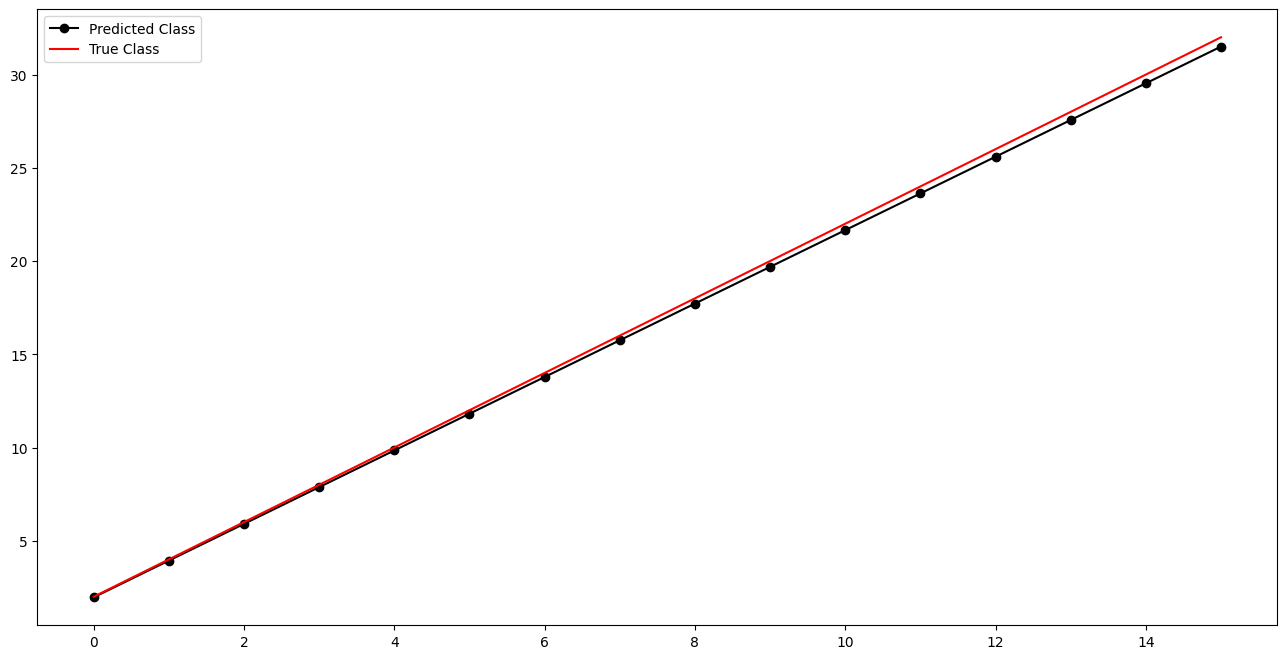

Text(0, 0.5, 'Significance')

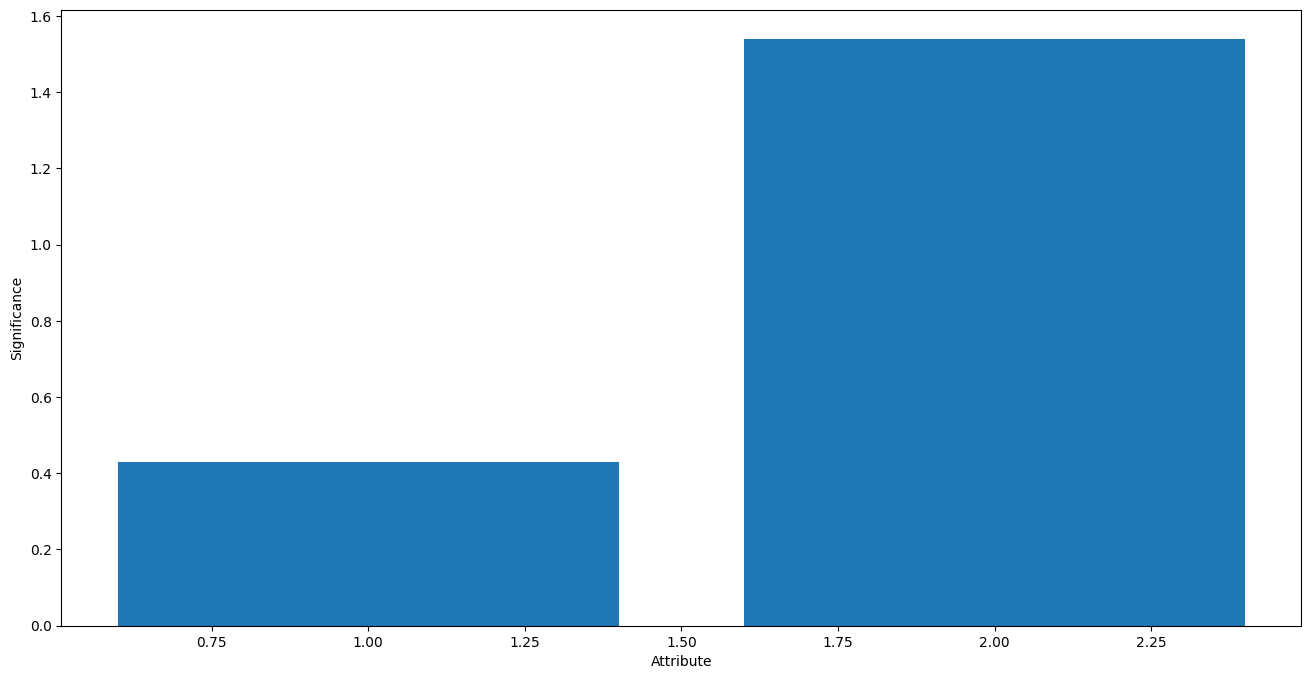

In [5]:
a=np.array([[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8],[9,9],[10,10],[11,11],[12,12],[13,13],[14,14],[15,15],[16,16]])
b=np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32])
U,S,VT=np.linalg.svd(a,full_matrices=False)
x_tilde=VT.T @ np.linalg.inv(np.diag(S)) @ U.T @b
print(x_tilde)
ind=np.arange(0,10)
plt.plot(a@x_tilde,'-o',label='Predicted Class',color='k')
plt.plot(b,label='True Class',color='r')
plt.legend()
plt.show()
plt.bar(np.arange(len(x_tilde))+1,x_tilde)
plt.xlabel('Attribute')
plt.ylabel('Significance')


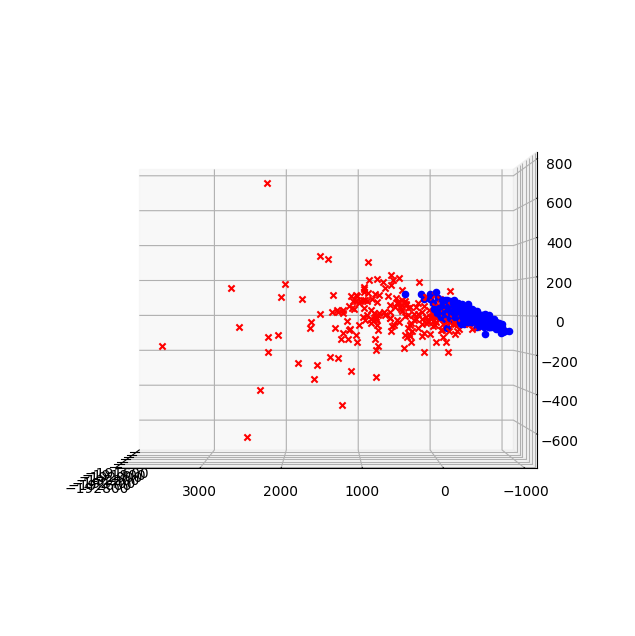

In [6]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
X=data['data']
X_mean=np.mean(X,axis=1)
B=X-(X_mean@np.ones(X.shape))
target=data['target']

U,S,VT=np.linalg.svd(B,full_matrices=False)

ax=plt.figure().add_subplot(111,projection='3d')

for j in range(B.shape[0]):
    x=VT[0]@B[j]
    y=VT[1]@B[j]
    z=VT[2]@B[j]
    if target[j]==0:
        ax.scatter(x,y,z,marker="x",color='r')
    else:
        ax.scatter(x,y,z,marker="o",color='b')
ax.view_init(0,-180)
plt.show()

In [7]:
import plotly.express as px 

from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
X=data['data']
X_mean=np.mean(X,axis=1)
B=X-(X_mean@np.ones(X.shape))
target=data['target']

U,S,VT=np.linalg.svd(B,full_matrices=False)

pc1=np.zeros(B.shape[0])
pc2=np.zeros(B.shape[0])
pc3=np.zeros(B.shape[0])

for j in range(B.shape[0]):
    x=VT[0]@B[j]
    y=VT[1]@B[j]
    z=VT[2]@B[j]
    pc1[j]=x
    pc2[j]=y
    pc3[j]=z

cancer_data=pd.DataFrame({'PC1':pc1,'PC2':pc2,'PC3':pc3,'target':data['target']+10})

fig = px.scatter_3d(cancer_data, x='PC1', y='PC2', z='PC3',color='target',size_max=1)
fig.show()

NameError: name 'pd' is not defined